In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
from numpy import unique

Creamos un dataframe en el cual se excluyen de por si columnas que no tienen nada de informacion.

In [3]:
df  = pd.read_csv('small_train.csv')

df1 = df.dropna(how='all', axis=1)

df1

,Id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Target
0,1,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1
1,2,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,-1
2,3,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1
3,4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1
4,5,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,NaN,NaN,NaN,NaN,NaN,357.0,0.0,NaN,NaN,...,oslk,EROH7Cg,LM8l689qOp,NaN,NaN,7FJQ,RAYp,F2FyR07IdsN7I,NaN,-1
49996,49997,NaN,NaN,NaN,NaN,NaN,1078.0,0.0,NaN,NaN,...,oslk,GfSQowC,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,am7c,-1
49997,49998,NaN,NaN,NaN,NaN,NaN,2807.0,7.0,NaN,NaN,...,oslk,dh6qI2t,LM8l689qOp,NaN,ELof,fKCe,RAYp,TCU50_Yjmm6GIBZ0lL_,NaN,-1
49998,49999,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,oslk,2fF2Oqu,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1


Ahora analizamos la data en sus partes numerica y categorica. Cada una separada por resultados de 1 y -1

In [4]:
numerical_data = df1.loc[:, "Var1":"Var190"]
numerical_target_data = numerical_data.join(df1["Target"])
df_numerical_t1 = numerical_target_data.loc[numerical_target_data.loc[:,"Target"]==1]
df_numerical_t1.describe()


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190,Target
count,22.000000,30.0,30.000000,47.0,8.500000e+01,3476.000000,3461.000000,22.000000,8.500000e+01,30.000000,...,3498.000000,4.700000e+01,3.000000e+01,30.000000,22.000000,22.00000,30.000000,1573.000000,13.000000,3682.0
mean,21.090909,0.0,4371.400000,0.0,2.093672e+05,1466.443613,7.461138,142.636364,2.288987e+05,9.066667,...,0.608348,1.139278e+06,9.811920e+04,2.533333,2.454545,41.00000,121.770000,274.356008,13564.626846,1.0
std,76.117021,0.0,23853.665323,0.0,4.477857e+05,2351.148475,6.291430,483.326720,4.663292e+05,4.570772,...,2.565105,1.740722e+06,2.394277e+05,4.980883,4.404838,133.53045,106.956838,83.051751,9516.049408,0.0
min,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,8.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,18.000000,1508.400000,1.0
25%,0.000000,0.0,0.000000,0.0,0.000000e+00,609.000000,7.000000,10.000000,0.000000e+00,8.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.50000,17.355000,216.000000,4878.000000,1.0
50%,0.000000,0.0,0.000000,0.0,0.000000e+00,952.000000,7.000000,30.000000,0.000000e+00,8.000000,...,0.000000,5.095620e+05,0.000000e+00,0.000000,0.000000,6.00000,148.830000,270.000000,12960.000000,1.0
75%,8.000000,0.0,0.000000,0.0,1.967300e+05,1660.750000,7.000000,73.500000,2.439360e+05,8.000000,...,0.000000,1.377453e+06,5.652700e+04,4.000000,6.000000,20.00000,185.145000,330.000000,21187.440000,1.0
max,360.000000,0.0,130668.000000,0.0,2.592000e+06,68439.000000,35.000000,2300.000000,2.332800e+06,32.000000,...,28.000000,7.200840e+06,1.209600e+06,20.000000,18.000000,634.00000,412.380000,642.000000,29589.840000,1.0


In [5]:
numerical_data = df1.loc[:, "Var1":"Var190"]
numerical_target_data = numerical_data.join(df1["Target"])
df_numerical_tn = numerical_target_data.loc[numerical_target_data.loc[:,"Target"]==-1]
df_numerical_tn.describe()


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190,Target
count,680.000000,1211.000000,1210.000000,1532.000000,1.402000e+03,40995.000000,41000.000000,680.000000,1.402000e+03,1210.000000,...,41493.000000,1.532000e+03,1.211000e+03,1211.000000,680.000000,680.000000,1211.000000,19449.000000,320.000000,46318.0
mean,11.176471,0.004129,327.461157,0.129243,2.405774e+05,1314.565849,6.754488,45.088235,4.025126e+05,8.614876,...,0.611718,1.425147e+06,7.726978e+04,8.607762,3.326471,15.752941,168.498084,269.801327,22350.018438,-1.0
std,39.098886,0.143681,2154.679029,1.294719,6.542114e+05,2711.855948,6.325972,131.182470,9.478455e+05,2.816490,...,2.489772,2.294233e+06,2.006827e+05,47.536890,8.888072,56.328179,113.958567,86.989794,29563.338098,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,8.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-6.420000,6.000000,0.000000,-1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,511.000000,0.000000,4.000000,0.000000e+00,8.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,19.590000,204.000000,2552.647500,-1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,20.000000,0.000000e+00,8.000000,...,0.000000,1.125990e+05,0.000000e+00,0.000000,0.000000,4.000000,199.860000,270.000000,12645.720000,-1.0
75%,16.000000,0.000000,0.000000,0.000000,1.131750e+05,1410.500000,7.000000,46.000000,2.647958e+05,8.000000,...,0.000000,1.876194e+06,4.842900e+04,8.000000,1.500000,14.000000,253.230000,330.000000,31458.982500,-1.0
max,680.000000,5.000000,42588.000000,27.000000,6.048550e+06,131761.000000,140.000000,2098.000000,1.230000e+07,40.000000,...,49.000000,1.199478e+07,3.048400e+06,1200.000000,102.000000,910.000000,628.620000,642.000000,230427.000000,-1.0


In [6]:
categorical_data = df1.loc[:, "Var191":"Target"]
df_categorical_t1 = categorical_data.loc[categorical_data.loc[:,"Target"]==1]
df_categorical_t1.describe(include='all')

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Target
count,39,3666,3682,959,3682,3682,3675,3682,3682,2173,...,3682,3682,3423,18,2160,3682,3682,3682,1930,3682.0
unique,1,224,31,3,11,2,155,1281,923,2060,...,7,1281,4,1,3,23,7,25,4,NaN
top,r__I,vAsTmBfHUn,RO12,SEuy,taul,1K8T,lK27,fhk21Ss,r83_sZi,QK29mKO,...,oslk,catzS2D,LM8l689qOp,4n2X,ELof,Qu4f,RAYp,F2FyR07IdsN7I,am7c,NaN
freq,39,47,2486,937,3541,3657,335,377,82,4,...,2572,377,2879,18,1201,433,2432,2201,1030,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [7]:
categorical_data = df1.loc[:, "Var191":"Target"]
df_categorical_tn = categorical_data.loc[categorical_data.loc[:,"Target"]==-1]
df_categorical_tn.describe(include='all')

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Target
count,1044,45965,46318,11825,46318,46318,46182,46318,46314,22419,...,46318,46318,41366,802,21696,46318,46318,46318,19638,46318.0
unique,1,360,51,3,23,4,223,4118,4865,14487,...,7,4118,4,1,3,23,7,30,4,NaN
top,r__I,1GdOj1KXzC,RO12,SEuy,taul,1K8T,0Xwj,fhk21Ss,r83_sZi,yP09M03,...,oslk,catzS2D,LM8l689qOp,4n2X,ELof,FSa2,RAYp,F2FyR07IdsN7I,am7c,NaN
freq,1044,354,33478,11630,44417,45893,4299,4064,873,73,...,34437,4064,33729,802,9871,7658,32724,30502,10659,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


Ahora analizamos si no hay alguna variable que pertenezca a solo una de estas cuatro divisiones. Esto es, quitando columnas que no tengan absolutamente ningun valor en alguna de las cuatro dataframes que hemos creado. Como ya hemos quitado columnas que no tenian ningun valor en todo el dataframe, si una columna fuera a no tener un valor en algunos de estas divisiones, significaría que se presenta solo en una instancia de compra o no compra.

Sin embargo, encontramos que no hay variables que solo pertenezcan, por ejemplo, al data frame numerico de puros compradores. Y asi para los otros tres data frames.Sabemos entonces que no hay una variable que ocurra solo cuando el cliente compro o solo cuando el cliente no compro. Podemos entonces seguir a limpiar el data frame inicial completo. 

In [8]:
just_in_nt1 = df_numerical_t1.dropna(how='all', axis=1)
just_in_ntn = df_numerical_tn.dropna(how='all', axis=1)
just_in_ct1 = df_categorical_t1.dropna(how='all', axis=1)
just_in_ctn = df_categorical_tn.dropna(how='all', axis=1)


Ahora entonces limpiamos el df inicial de columnas de las cuales no se sepa mucho, esto es, que tengan un conteo muy bajo.  Así como columnas que tengan un unique value de 1. Así como filas que no tengan tanta informacion, se busca tener el dataframe mas completo y rico en informacion para despues poder analizar cuales son las variables de mas peso. 

In [9]:
df1.describe()

,Id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,...,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190,Target
count,50000.000000,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,702.000000,1.487000e+03,...,44991.000000,1.579000e+03,1.241000e+03,1241.000000,702.000000,702.00000,1241.000000,21022.000000,333.000000,50000.000000
mean,25000.500000,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,48.145299,3.925884e+05,...,0.611456,1.416638e+06,7.777380e+04,8.460919,3.299145,16.54416,167.368477,270.142137,22007.045192,-0.852720
std,14433.901067,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,154.777855,9.278684e+05,...,2.495681,2.279786e+06,2.016188e+05,46.973777,8.781967,60.22303,113.980072,86.707692,29085.146490,0.522373
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,-6.420000,6.000000,0.000000,-1.000000
25%,12500.750000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,4.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,19.380000,204.000000,2732.670000,-1.000000
50%,25000.500000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,20.000000,0.000000e+00,...,0.000000,1.167780e+05,0.000000e+00,0.000000,0.000000,4.00000,197.640000,270.000000,12668.940000,-1.000000
75%,37500.250000,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,46.000000,2.628630e+05,...,0.000000,1.844952e+06,4.881000e+04,8.000000,6.000000,14.00000,252.960000,330.000000,29396.340000,-1.000000
max,50000.000000,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,2300.000000,1.230000e+07,...,49.000000,1.199478e+07,3.048400e+06,1200.000000,102.000000,910.00000,628.620000,642.000000,230427.000000,1.000000


In [10]:
low_colcount_arr = []

for column in df1.columns: 
   if (df1[column].count()) <= 12000: 
      low_colcount_arr.append(column)


df2 = df1.drop(low_colcount_arr, axis=1)

df3 = df2.dropna(thresh=44)

df3      

,Id,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,...,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229,Target
0,1,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,...,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1
1,2,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,...,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,-1
2,3,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,...,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1
3,4,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,...,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1
4,5,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,...,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,266.0,0.0,0.0,792.0,990.0,18.0,432.0,336.56,0.0,...,kH5eMLh,oslk,dclJEx2,LM8l689qOp,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1
49995,49996,357.0,0.0,0.0,132.0,165.0,2.0,0.0,288.08,0.0,...,3JmRJnY,oslk,EROH7Cg,LM8l689qOp,NaN,7FJQ,RAYp,F2FyR07IdsN7I,NaN,-1
49996,49997,1078.0,0.0,2736.0,380.0,475.0,2.0,88.0,166.56,0.0,...,MMTv4zN,oslk,GfSQowC,LM8l689qOp,kG3k,FSa2,RAYp,55YFVY9,am7c,-1
49997,49998,2807.0,7.0,1460.0,568.0,710.0,4.0,328.0,166.56,0.0,...,FM28hdx,oslk,dh6qI2t,LM8l689qOp,ELof,fKCe,RAYp,TCU50_Yjmm6GIBZ0lL_,NaN,-1


In [11]:
target_1_df1 = df3.loc[df3.loc[:,"Target"]==1]
target_percentage_df1 = (target_1_df1.shape[0]/df1.shape[0])*100
target_percentage_df1



6.9959999999999996

In [12]:
target_1_df3 = df3.loc[df3.loc[:,"Target"]==1]

target_percentage_df3 = (target_1_df3.shape[0]/df3.shape[0])*100
target_percentage_df3


7.774888310995533

Despues de limpiar el dataframe en base a conteo bajo por columna y fila asi como valores unicos. Ahora tenemos un dataframe de solo 78 columnas x 44991 filas. Con un conteo de valores aceptable, ya que bajo nuestro porcentage de target_1 un 0.8% solamente, por columna y fila. Asi como ninguna columna con un valor unico de 1. Es decir, todas tienen mas de un valor diferente. 

Analizamos la parte numerica del dataframe resultante.

In [13]:
numerical_data_clean = df3.loc[:, "Var6":"Var189"].join(df3["Target"])
numerical_data_clean

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Target
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,0.0,9.0,397579.0,1812252.0,142.0,38418.0,0.0,0.0,462.0,-1
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0.0,9.0,278334.0,10439160.0,32.0,238572.0,0.0,0.0,NaN,-1
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,0.0,36.0,320565.0,9826360.0,206.0,434946.0,0.0,0.0,NaN,-1
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,-1
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,0.0,9.0,267162.0,644836.0,2.0,0.0,0.0,0.0,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,266.0,0.0,0.0,792.0,990.0,18.0,432.0,336.56,0.0,2214786.0,...,0.0,0.0,26159.0,3640968.0,104.0,138432.0,0.0,0.0,NaN,-1
49995,357.0,0.0,0.0,132.0,165.0,2.0,0.0,288.08,0.0,6042420.0,...,0.0,9.0,604800.0,10367040.0,22.0,0.0,0.0,0.0,NaN,-1
49996,1078.0,0.0,2736.0,380.0,475.0,2.0,88.0,166.56,0.0,0.0,...,0.0,9.0,85120.0,1344900.0,150.0,9540.0,0.0,0.0,396.0,-1
49997,2807.0,7.0,1460.0,568.0,710.0,4.0,328.0,166.56,0.0,42210.0,...,0.0,27.0,4410.0,1242044.0,124.0,61734.0,0.0,0.0,NaN,-1


Ahora pasaremos a un modelo de regresion lineal, con el objetivom uno de poder predecir cuales son las variables que mas afectan la compra de un nuevo paquete. Para eso, tenemos que hacer primero un Factor de Inflacion de Varianza.  Lo cual nos permitira saber cuales son los valores de numerical data que son independientes y no multicolineales. Esto es, saber los valores que realmente nos aportan informacion y que a parte no nos digan lo mismo que otras variables en el data frame. Que no sean redundantes.

In [16]:
#VIF
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = "+".join(numerical_data_clean.columns.drop("Target"))
y, X = dmatrices('Target ~' + features, numerical_data_clean, return_type='dataframe')


In [772]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

/Users/diegotoledano/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [773]:
vif["VIF Factor"]

0     28.111154
1      2.381601
2      2.695191
3      1.435265
4           inf
5           inf
6      4.223529
7           inf
8      1.135592
9           inf
10    13.499510
11          inf
12     1.003485
13     2.481849
14     2.328489
15     2.341341
16     1.143563
17     2.941236
18          inf
19     1.688825
20          inf
21          inf
22     1.110851
23     8.509481
24          inf
25     1.330827
26     3.258327
27          inf
28     1.036025
29     1.090050
30          inf
31     8.737674
32     4.056738
33     1.118861
34          inf
35     1.787269
36     1.259939
37    31.948030
38          inf
39     2.030401
40          inf
41          inf
42     1.056002
Name: VIF Factor, dtype: float64

Tenemos nuestras variables ya con VIF implementado y pasamos a limpiar las que no tuvieron varianza, es decir no son independientes y las que tuvieron demasiada. 

In [774]:
vif_clean = vif.loc[~np.isinf(vif.loc[:,"VIF Factor"]) & (vif.loc[:,"VIF Factor"]< 13)] 

original_list = list(vif_clean['features'])
elements_to_remove = ["Var72","Var94","Var126","Var189"]
filtered = [i for i in original_list if i not in elements_to_remove ]
filtered
regression_list = filtered
vif_clean



,VIF Factor,features
1,2.381601,Var6
2,2.695191,Var7
3,1.435265,Var13
6,4.223529,Var24
8,1.135592,Var28
12,1.003485,Var57
13,2.481849,Var65
14,2.328489,Var72
15,2.341341,Var73
16,1.143563,Var74


Ahora aplicaremos un modelo de Linear Regression. Preparamos los inputs y el array de objetivos.  Y escalamos, esto es para que los inputs esten en la escala en la que estan los resultados con los que entrenara, y haya una relacion dimensional que nos pueda dar a entender mejor su relacion. Tambien preparamos el array de train y test para el modelo. Tambien se remueven absolutamente todos los valores NaN, ya que el modelo no acepta de estos. 

In [775]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

scaler = MinMaxScaler()
inputs = numerical_data_clean[regression_list].dropna(axis=0)
target = numerical_data_clean[regression_list+["Target"]].dropna(axis=0)
targets = target["Target"].map({-1:0,1:1})
scaler.fit(inputs)






MinMaxScaler()

In [784]:
inputs_scaled = scaler.transform(inputs)
df_inputs_scaled = pd.DataFrame(inputs_scaled)

df_inputs_scaled

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.011582,0.05,0.000930,0.028340,0.044674,0.582403,0.000000,0.095238,0.000246,0.069799,...,0.013948,0.419491,0.011137,0.000132,0.080772,0.012054,0.000355,0.111111,0.023478,0.002647
1,0.003984,0.00,0.000000,0.004049,0.080453,0.772569,0.000000,0.055556,0.000000,0.148444,...,0.005365,0.391453,0.005569,0.000000,0.275580,0.062252,0.000000,0.111111,0.016436,0.016436
2,0.039739,0.05,0.004569,0.052632,0.054916,0.942807,0.000000,0.468254,0.003644,0.086587,...,0.041845,0.436494,0.030698,0.001098,0.231774,0.043403,0.001537,0.444444,0.018930,0.029965
3,0.007810,0.05,0.016253,0.008097,0.051073,0.650339,0.052632,0.277778,0.001576,0.040532,...,0.004292,0.413167,0.001999,0.002780,0.010037,0.011516,0.006253,0.111111,0.015776,0.000000
4,0.004994,0.05,0.015950,0.004049,0.051073,0.023744,0.000000,0.452381,0.001379,0.010802,...,0.004292,0.434407,0.007139,0.000356,0.042706,0.007617,0.000682,0.111111,0.000156,0.004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42148,0.002019,0.00,0.000000,0.036437,0.077207,0.062534,0.000000,0.007937,0.000000,0.018400,...,0.031116,0.430566,0.009376,0.000000,0.080557,0.039733,0.000000,0.000000,0.001545,0.009537
42149,0.002709,0.00,0.000000,0.004049,0.067929,0.393976,0.105263,0.039683,0.000000,0.142857,...,0.004292,0.417614,0.004807,0.000000,0.297632,0.000000,0.000000,0.111111,0.035714,0.000000
42150,0.008181,0.00,0.013827,0.004049,0.044674,0.084966,0.105263,0.476190,0.002955,0.011592,...,0.001073,0.326076,0.013850,0.005493,0.095526,0.006914,0.000000,0.111111,0.005026,0.000657
42151,0.021304,0.05,0.007379,0.008097,0.044674,0.939144,0.000000,0.611111,0.000640,0.032736,...,0.015021,0.418801,0.016563,0.001326,0.048957,0.022943,0.001297,0.333333,0.000260,0.004253


In [785]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state=123)


In [786]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [787]:
prediction = regression.predict(x_train)



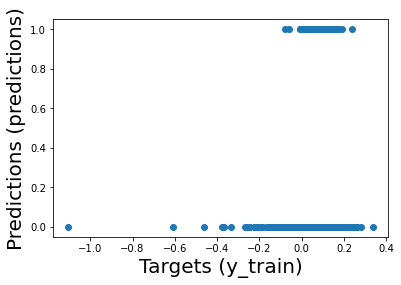

In [788]:
plt.scatter(prediction,y_train)
plt.xlabel("Targets (y_train)", size = 20)
plt.ylabel('Predictions (predictions)', size = 20)

#because we want to compare the values, we will fix the limits 
plt.show()

Podemos observar que en efecto hay valores de algunas variables que predicen una compra de paquete mas caro. Y que claramente, en general, entre mas esten por arriba de cero, se predice una compra. Esto es, estas variables suben, y tambien la probabilidad de compra.

In [789]:
regression.coef_

array([ 0.33805736,  0.01446217,  0.03048432,  0.28417328, -1.23094276,
        0.01040465,  0.02174942,  0.03541684, -0.08400338, -0.0127553 ,
       -0.17967084, -0.17656753,  0.37983261, -0.42600316,  0.11387957,
       -0.02771795, -0.05030008,  0.18675485, -0.06815024,  0.03944363,
       -0.01427571])

In [790]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary['Weights'] = regression.coef_
reg_summary

,Features,Weights
0,Var6,0.338057
1,Var7,0.014462
2,Var13,0.030484
3,Var24,0.284173
4,Var28,-1.230943
5,Var57,0.010405
6,Var65,0.021749
7,Var73,0.035417
8,Var74,-0.084003
9,Var76,-0.012755


''''RESPUESTA PARA VALORES NUMERICOS'''''

En un analisis preliminar podemos ver que hay claramente variables con un peso considerable en lo positivo, que ya vimos predicen una compra. Var6, Var24, Var113, Var125 y Var 140, en el dataframe de valores numericos, son los que en cuanto a su presencia y su presencia mas alta daria la calificacion de 1 a 10. El siguiente paso sería desescalar estas variables y juzgar cuales serian las escalas en la vida real que darian esta calificacion. 

En cuanto a los valores categoricos. No es posible hacer un VIF con ellos. Se tiene que hacer algo llamado GVIF. Lamentablemente aun no soy tan proficiente en analisis de datos como para poder hacer esto en el tiempo especificado. Sin duda soy capaz de hacerlo sin embargo. A continuacion explico el proceso que seguiría.

Primero se tendrían que trabajar los datos para pasarlos a ser numericos. Mi idea despues era limpiar por igual esta data, lo cual fue un problema por varias razones. 

1. El metodo dummies dejaba muchos ceros, que no permitian un VIF bueno y mucho menos un modelo.
2. Como se puede observar debajo, el resultado es una matriz de 44991 filas × 6937 columnas.

No he tuve tiempo de atacar este problema exitosamente. Debajo esta una pequeña muestra del inicio de codigo de lo que menciono. 

In [746]:
categorical_dummy = pd.concat([pd.get_dummies(categorical_data_3[col]) for col in categorical_data_3], axis=1, keys=categorical_data_3.columns)

categorical_dummy.shape

(44991, 69300)

En este dataframe se tiene la presencia de las variables categoricas de cada fila en manera numerica.  

In [448]:
data_clean = df3.join(categorical_dummy)

data_clean

/Users/diegotoledano/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Id,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,...,"(Var228, iyHGyLCEkQ)","(Var228, n1OBWGkV3fbsHR75taC)","(Var228, r_7E)","(Var228, xwM2aC7IdeMC0)","(Var229, am7c)","(Var229, mj86)","(Var229, oJmt)","(Var229, sk2h)","(Target, -1)","(Target, 1)"
0,1,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,...,0,0,0,0,0,0,0,0,1,0
2,3,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,...,0,0,0,0,1,0,0,0,1,0
3,4,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,...,0,0,0,0,0,0,0,0,1,0
4,5,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,266.0,0.0,0.0,792.0,990.0,18.0,432.0,336.56,0.0,...,0,0,0,0,0,0,0,0,1,0
49995,49996,357.0,0.0,0.0,132.0,165.0,2.0,0.0,288.08,0.0,...,0,0,0,0,0,0,0,0,1,0
49996,49997,1078.0,0.0,2736.0,380.0,475.0,2.0,88.0,166.56,0.0,...,0,0,0,0,1,0,0,0,1,0
49997,49998,2807.0,7.0,1460.0,568.0,710.0,4.0,328.0,166.56,0.0,...,0,0,0,0,0,0,0,0,1,0


'''CONCLUSIONES Y COMENTARIOS'''

En este ejercicio, creo haber abordado correctamente la visualización del problema. Así como la limpieza de data y su preparacion para un modelo predictivo. Se que hay errores desde ahorita y algunos que veo son los siguientes:

1. Un modelo de Regresión Logistica hubiera sido el indicado. Para la hora en la que me di cuanta de esto intente implementarlo con "statsmodels.api as sm". Sin embargo me encontre con unos problemas en cuanto a dimensiones de input y target que me tomarían mas tiempo.

2. La data categorica no fue modelada y no se llego a una predicción. 

3. Con m as tiempo, pude haber desescalado los valores resultados del analisis a la parte de valores numericos. Y presentado un codigo de implementacion de calificación.


Actualmente estoy realizando estudios y tareas aparte del rubro de  Data Analysis. No es excusa, lo menciono solo para dar a entender que mis habilidades actuales estan un poco oxidadas, que sigo aprendiendo y sobre todo, que pienso seguir aprendiendo, intensamente. Espero poder tener la oportunidad de presentar mi challenge y sobre todo, de poder colaborar en un futuro con Crabi.

Gracias.